In [1]:
import os
os.chdir('../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

In [2]:
X_drug, X_target, y = load_AID1706_SARS_CoV_3CL('./kh278/DeepPurpose/data', oversample_num = 30)

drug_encoding = 'MPNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, [X_target], y, 
                                drug_encoding, target_encoding, 
                                split_method='HTS',frac=[0.8,0.1,0.1])

Beginning Processing...


/home/kh278/.conda/envs/DeepPurpose/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/kh278/DeepPurpose/dataset.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['binary_label'][(val.PUBCHEM_ACTIVITY_SCORE >= threshold) & (val.PUBCHEM_ACTIVITY_SCORE <=100)] = 1


Default binary threshold for the binding affinity scores is 15, recommended by the investigator
Done!
in total: 26640 drug-target pairs
encoding drug...
unique drugs: 13764
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
splitting dataset...
Done.


In [3]:
X_target

'SGFKKLVSPSSAVEKCIVSVSYRGNNLNGLWLGDSIYCPRHVLGKFSGDQWGDVLNLANNHEFEVVTQNGVTLNVVSRRLKGAVLILQTAVANAETPKYKFVKANCGDSFTIACSYGGTVIGLYPVTMRSNGTIRASFLAGACGSVGFNIEKGVVNFFYMHHLELPNALHTGTDLMGEFYGGYVDEEVAQRVPPDNLVTNNIVAWLYAAIISVKESSFSQPKWLESTTVSIEDYNRWASDNGFTPFSTSTAITKLSAITGVDVCKLLRTIMVKSAQWGSDPILGQYNFEDELTPESVFNQVGGVRLQ'

In [4]:
# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 10, 
                         LR = 0.001, 
                         batch_size = 128,
                         cnn_target_filters = [32,64],
                         cnn_target_kernels = [4,8,12],
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3
                        )

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69390976. Total time 0.0005555555555555556 hours
Training at Epoch 1 iteration 100 with loss 0.6797779. Total time 0.012777777777777779 hours
Validation at Epoch 1 , AUROC: 0.656721467788321 , AUPRC: 0.1139377227627888 , F1: 0.11555555555555558
Training at Epoch 2 iteration 0 with loss 0.5824497. Total time 0.021666666666666667 hours
Training at Epoch 2 iteration 100 with loss 0.6559816. Total time 0.03388888888888889 hours
Validation at Epoch 2 , AUROC: 0.7435984190209618 , AUPRC: 0.203749053162305 , F1: 0.2
Training at Epoch 3 iteration 0 with loss 0.60759115. Total time 0.043055555555555555 hours
Training at Epoch 3 iteration 100 with loss 0.4939893. Total time 0.05527777777777778 hours
Validation at Epoch 3 , AUROC: 0.7398151423342509 , AUPRC: 0.2222624968576843 , F1: 0.12955465587044535
Training at Epoch 4 iteration 0 with loss 0.35813576. Total time 0.06444444444444444 ho

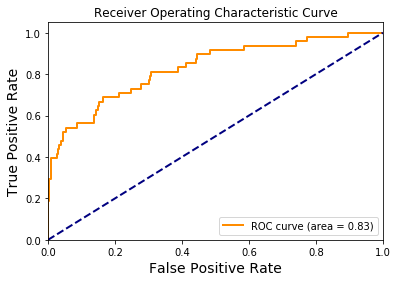

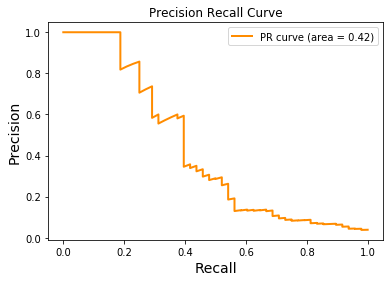

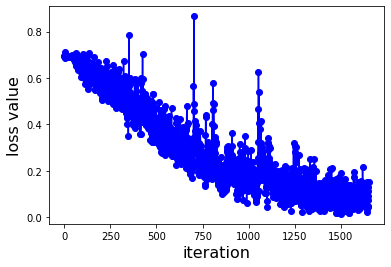

In [5]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [6]:
X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub('./kh278/DeepPurpose/data')
target, target_name = load_SARS_CoV_Protease_3CL()

_ = models.repurpose(X_repurpose, target, 
                     model, drug_cid, target_name, 
                     convert_y = False)

repurposing...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
drug encoding finished...
encoding protein...
unique target sequence: 1
protein encoding finished...
Done.
predicting...
---------------
Drug Repurposing Result for SARS-CoV 3CL Protease
+------+-------------+-----------------------+-------------+-------------+
| Rank |  Drug Name  |      Target Name      | Interaction | Probability |
+------+-------------+-----------------------+-------------+-------------+
|  1   |    3739.0   | SARS-CoV 3CL Protease |     YES     |     1.00    |
|  2   |   27873.0   | SARS-CoV 3CL Protease |     YES     |     1.00    |
|  3   |    6806.0   | SARS-CoV 3CL Protease |     YES     |     1.00    |
|  4   |    3735.0   | SARS-CoV 3CL Protease |     YES     |     1.00    |
|  5   |    5819.0   | SARS-CoV 3CL Protease |     YES     |     1.00    |
|  6   |   152256.0  | SARS-CoV 3CL Protease |     YES     |     1.00    |
|  7   |   11862.0   | SARS-CoV 3CL Protease |     YES